In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import utils
from vgg.imagenet_classes import class_names
from vgg.VGG import generate_VGG16

In [3]:
print("TensorFlow version : {}".format(tf.__version__))
print("Devices : {}".format(utils.get_tensorflow_devices()))

TensorFlow version : 1.1.0
Devices : [('/cpu:0', 'CPU'), ('/gpu:0', 'GPU')]


In [4]:
IMG_W = 224
IMG_H = 224
CHANNELS = 3

LOG_DIR = 'logs/'

In [5]:
if tf.gfile.Exists(LOG_DIR):
    tf.gfile.DeleteRecursively(LOG_DIR)
    
tf.gfile.MakeDirs(LOG_DIR)

In [6]:
MODEL_WEIGHTS = 'vgg/vgg16.npy'

In [7]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession()

In [8]:
model, vgg_scope = generate_VGG16(weights_file=MODEL_WEIGHTS,
                                  scope="VGG16",
                                  apply_preprocess=True,
                                  remove_top=False,
                                  input_shape=(1, IMG_W, IMG_H, CHANNELS))

(1, 224, 224, 3)


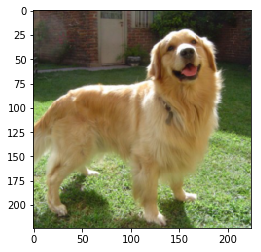

In [10]:
img = utils.load_image("images/golden_retriever.jpg",
                       width=IMG_W, height=IMG_H,
                       expand_dim=True)
print(img.shape)
plt.imshow(img[0])

In [11]:
sess.run(tf.global_variables_initializer())
_ = sess.run(model['input'].assign(img))

In [12]:
prob = sess.run(model['prob'])[0]
preds = (np.argsort(prob)[::-1])[0:5]
for p in preds:
    print(class_names[p], prob[p])

golden retriever 0.310452
Tibetan mastiff 0.0678543
Tibetan terrier, chrysanthemum dog 0.0509804
Pekinese, Pekingese, Peke 0.050091
Saint Bernard, St Bernard 0.0424102


In [13]:
fmaps_conv2_2 = sess.run(model['conv2_2'])

In [14]:
fmaps_conv2_2.shape

(1, 112, 112, 128)

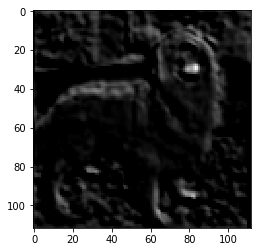

In [15]:
plt.imshow(fmaps_conv2_2[0,:,:,0],cmap='gray')

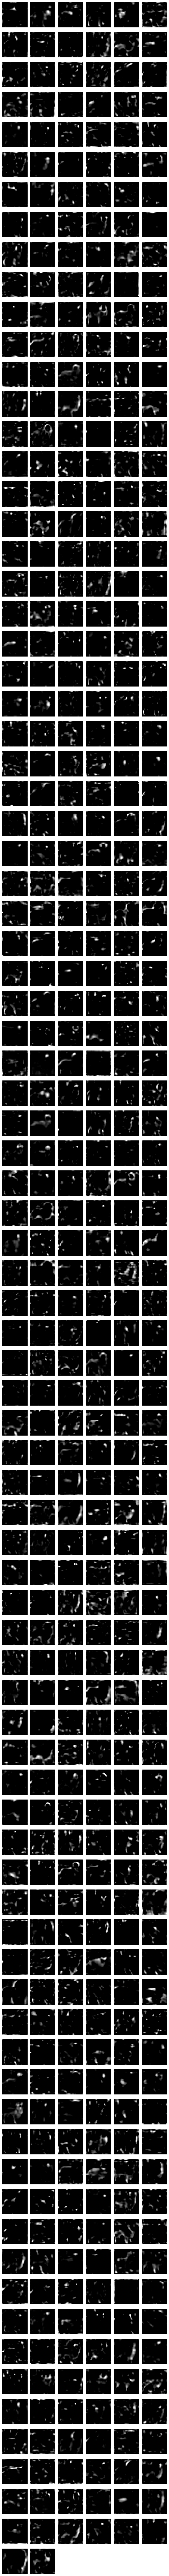

In [19]:
utils.get_activations(sess, model, 'conv4_3', fmap=-1, nb_col=6)